In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [4]:
dataset = pd.read_excel("~/Documents/Python/coffee_sales/Coffee Shop Sales.xlsx")

In [17]:
df=dataset.copy()

In [18]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [19]:
#Check for null values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [21]:
df['transaction_time'] = df['transaction_time'].astype('str')
df['transaction_time'] = pd.to_timedelta(df['transaction_time'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  int64          
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  int64          
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  int64          
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 12.5+ MB


In [24]:
df['sales'] = df['unit_price'] * df['transaction_qty']
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,0 days 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00
149112,149453,2023-06-30,0 days 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00
149113,149454,2023-06-30,0 days 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00
149114,149455,2023-06-30,0 days 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75


In [25]:
df['datetime'] = df['transaction_date'] + df['transaction_time']

In [26]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,datetime
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01-01 07:06:11
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:08:56
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01-01 07:14:04
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01-01 07:20:24
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01-01 07:22:41


In [27]:
df.describe()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,product_id,unit_price,sales,datetime
count,149116.000000,149116,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116
mean,74737.371872,2023-04-15 11:50:32.173609984,0 days 12:14:15.815794415,1.438276,5.342063,47.918607,3.382219,4.686367,2023-04-16 00:04:47.989404160
min,1.000000,2023-01-01 00:00:00,0 days 06:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,2023-01-01 07:06:11
25%,37335.750000,2023-03-06 00:00:00,0 days 09:05:10.500000,1.000000,3.000000,33.000000,2.500000,3.000000,2023-03-06 13:37:08
50%,74727.500000,2023-04-24 00:00:00,0 days 11:15:28,1.000000,5.000000,47.000000,3.000000,3.750000,2023-04-24 08:24:32.500000
75%,112094.250000,2023-05-30 00:00:00,0 days 15:25:57,2.000000,8.000000,60.000000,3.750000,6.000000,2023-05-30 07:16:13
max,149456.000000,2023-06-30 00:00:00,0 days 20:59:32,8.000000,8.000000,87.000000,45.000000,360.000000,2023-06-30 20:57:19
std,43153.600016,NaN,0 days 03:45:57.901686173,0.542509,2.074241,17.930020,2.658723,4.227099,NaN


In [32]:
df_location = df.groupby('store_location').agg({
    'sales':'sum',
    'transaction_qty':'count'
}).reset_index()

(array([19358, 19389, 19417, 19448, 19478, 19509, 19538]),
 [Text(19358, 0, 'Jan\n2023'),
  Text(19389, 0, 'Feb'),
  Text(19417, 0, 'Mar'),
  Text(19448, 0, 'Apr'),
  Text(19478, 0, 'May'),
  Text(19509, 0, 'Jun'),
  Text(19538, 0, '')])

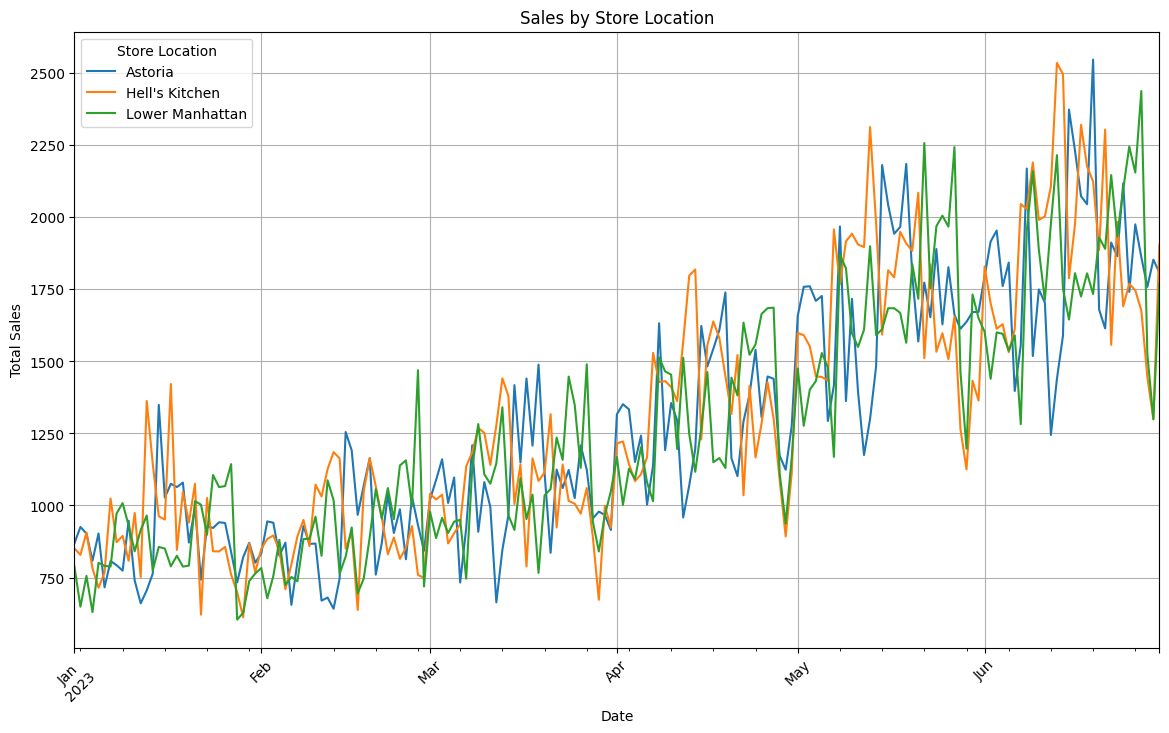

In [36]:
daily_sales_by_location = df.groupby(['transaction_date', 'store_location'])['sales'].sum().unstack()

daily_sales_by_location.plot(figsize=(14,8))
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Sales by Store Location')
plt.legend(title = 'Store Location')
plt.grid(True)
plt.xticks(rotation = 45)

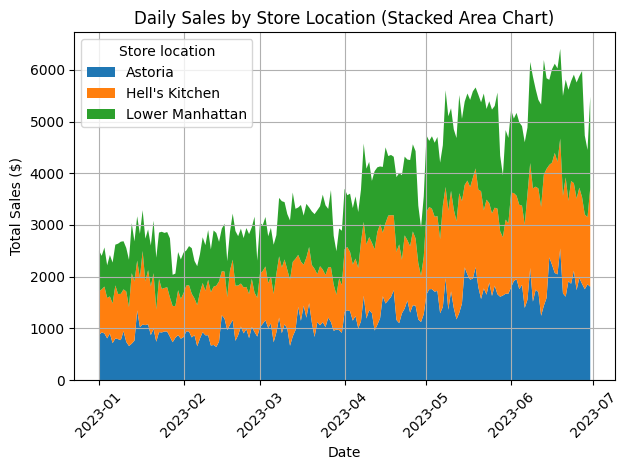

In [38]:
plt.stackplot(daily_sales_by_location.index, daily_sales_by_location.T, labels = daily_sales_by_location.columns)

plt.title('Daily Sales by Store Location (Stacked Area Chart)')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.legend(title = 'Store location', loc = 'upper left')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()

In [44]:
#Time series analysis
daily_sales = df.groupby('transaction_date')['sales'].sum().reset_index()

df['day_of_week'] = df['datetime'].dt.day_name()

weekly_sales = df.groupby('day_of_week')['sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

df['month'] = df['datetime'].dt.to_period('M')
monthly_sales = df.groupby('month')['sales'].sum().reset_index()

daily_sales, weekly_sales, monthly_sales

(    transaction_date    sales
 0         2023-01-01  2508.20
 1         2023-01-02  2403.35
 2         2023-01-03  2565.00
 3         2023-01-04  2220.10
 4         2023-01-05  2418.85
 ..               ...      ...
 176       2023-06-26  5875.90
 177       2023-06-27  5975.65
 178       2023-06-28  4728.90
 179       2023-06-29  4450.75
 180       2023-06-30  5481.32
 
 [181 rows x 2 columns],
   day_of_week      sales
 0      Monday  101677.28
 1     Tuesday   99455.94
 2   Wednesday  100313.54
 3    Thursday  100767.78
 4      Friday  101373.00
 5    Saturday   96894.48
 6      Sunday   98330.31,
      month      sales
 0  2023-01   81677.74
 1  2023-02   76145.19
 2  2023-03   98834.68
 3  2023-04  118941.08
 4  2023-05  156727.76
 5  2023-06  166485.88)